In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os

## Zmiana rozmaru zdjęć oraz powiększenie zbioru danych 

In [2]:
root = os.getcwd()
load_dir = os.path.join(root, "images\keras_train")
print(f"Current working directory: {root}")
print(f"Loading images from: {load_dir}")
dirs = [dir for dir in os.scandir(load_dir) if os.path.isdir(dir)]
labels = [x.name for x in dirs]
labels

Current working directory: c:\Users\adaml\Desktop\tram-prediction
Loading images from: c:\Users\adaml\Desktop\tram-prediction\images\keras_train


['Konstal 105Na',
 'Moderus Beta',
 'Moderus Gamma',
 'Protram 105NaWr',
 'Skoda 19T']

In [3]:
def show_img(img):
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()

In [4]:
def augument_image(img,name,save_dir):
    img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    #cv2.imwrite(os.path.join(save_dir,name+"_rot90.png"),img_rot)
    #img_rot = cv2.rotate(img_rot, cv2.ROTATE_90_CLOCKWISE)
    #cv2.imwrite(os.path.join(save_dir,name+"_rot180.png"),img_rot)
    #img_rot = cv2.rotate(img_rot, cv2.ROTATE_90_CLOCKWISE)
    #cv2.imwrite(os.path.join(save_dir,name+"_rot270.png"),img_rot)

    alpha_ = 1.2
    beta_ = 50
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_0.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_0.png"),img_rot_light)
    alpha_ = 1.2
    beta_ = 10
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_1.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_1.png"),img_rot_light)

    alpha_ = 0.3
    beta_ = 10
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_2.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_2.png"),img_rot_light)
    alpha_ = 0.3
    beta_ = 50
    img_light = cv2.addWeighted(img, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_light_3.png"),img_light)
    img_rot_light = cv2.addWeighted(img_rot, alpha_, np.zeros(img.shape, img.dtype), 0, beta_)
    cv2.imwrite(os.path.join(save_dir,name+"_rot_light_3.png"),img_rot_light)


In [5]:
dim = (256, 256)

# Commented out because images are already processed
# for dir in dirs:
#     print(dir.name)
#     os.chdir(dir) 
#     for index,file in enumerate(list(os.listdir())):
#         try:
#             renamed = f"{dir.name}_{index}.png"
#             os.rename(file,renamed)
#         except FileExistsError:
#             print(f"File {renamed} exists")   
#         img = cv2.imread(renamed)
#         #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#         try:
#             cv2.imwrite(os.path.join(save_dir,dir.name,renamed),resized)
#         except FileExistsError:
#             os.remove(save_dir+renamed)
#             cv2.imwrite(os.path.join(save_dir,renamed),resized)
#         augument_image(resized,f"{dir.name}_{index}",os.path.join(save_dir,dir.name))

        
#     os.chdir('../')

print("Number of images per class:")
for dir in dirs:
    num_files = len([name for name in os.listdir(os.path.join(load_dir,dir.name)) if os.path.isfile(os.path.join(load_dir,dir.name,name))])
    print(f"{dir.name}: {num_files}")

Number of images per class:
Konstal 105Na: 189
Moderus Beta: 343
Moderus Gamma: 207
Protram 105NaWr: 243
Skoda 19T: 252


## Wczytywanie obrazów jako dataset

In [6]:
import re
def load_dataset(path,labels):
    Y_label = {lab:i for i,lab in enumerate(labels)}
    X = []
    Y = []
    dirs = list(os.listdir(path))
    for index,file in enumerate(dirs):
        print(f"{index+1}/{len(dirs)}")
        img = cv2.imread(os.path.join(path,file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(img)
        print(Y_label[list(re.split('_',file))[0]],list(re.split('_',file))[0])
        Y.append(Y_label[list(re.split('_',file))[0]])
    
    plt.rcParams["figure.figsize"] = (10,10)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X[i],plt.cm.binary,interpolation='bicubic')
        plt.xlabel(labels[Y[i]])
    plt.show()
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

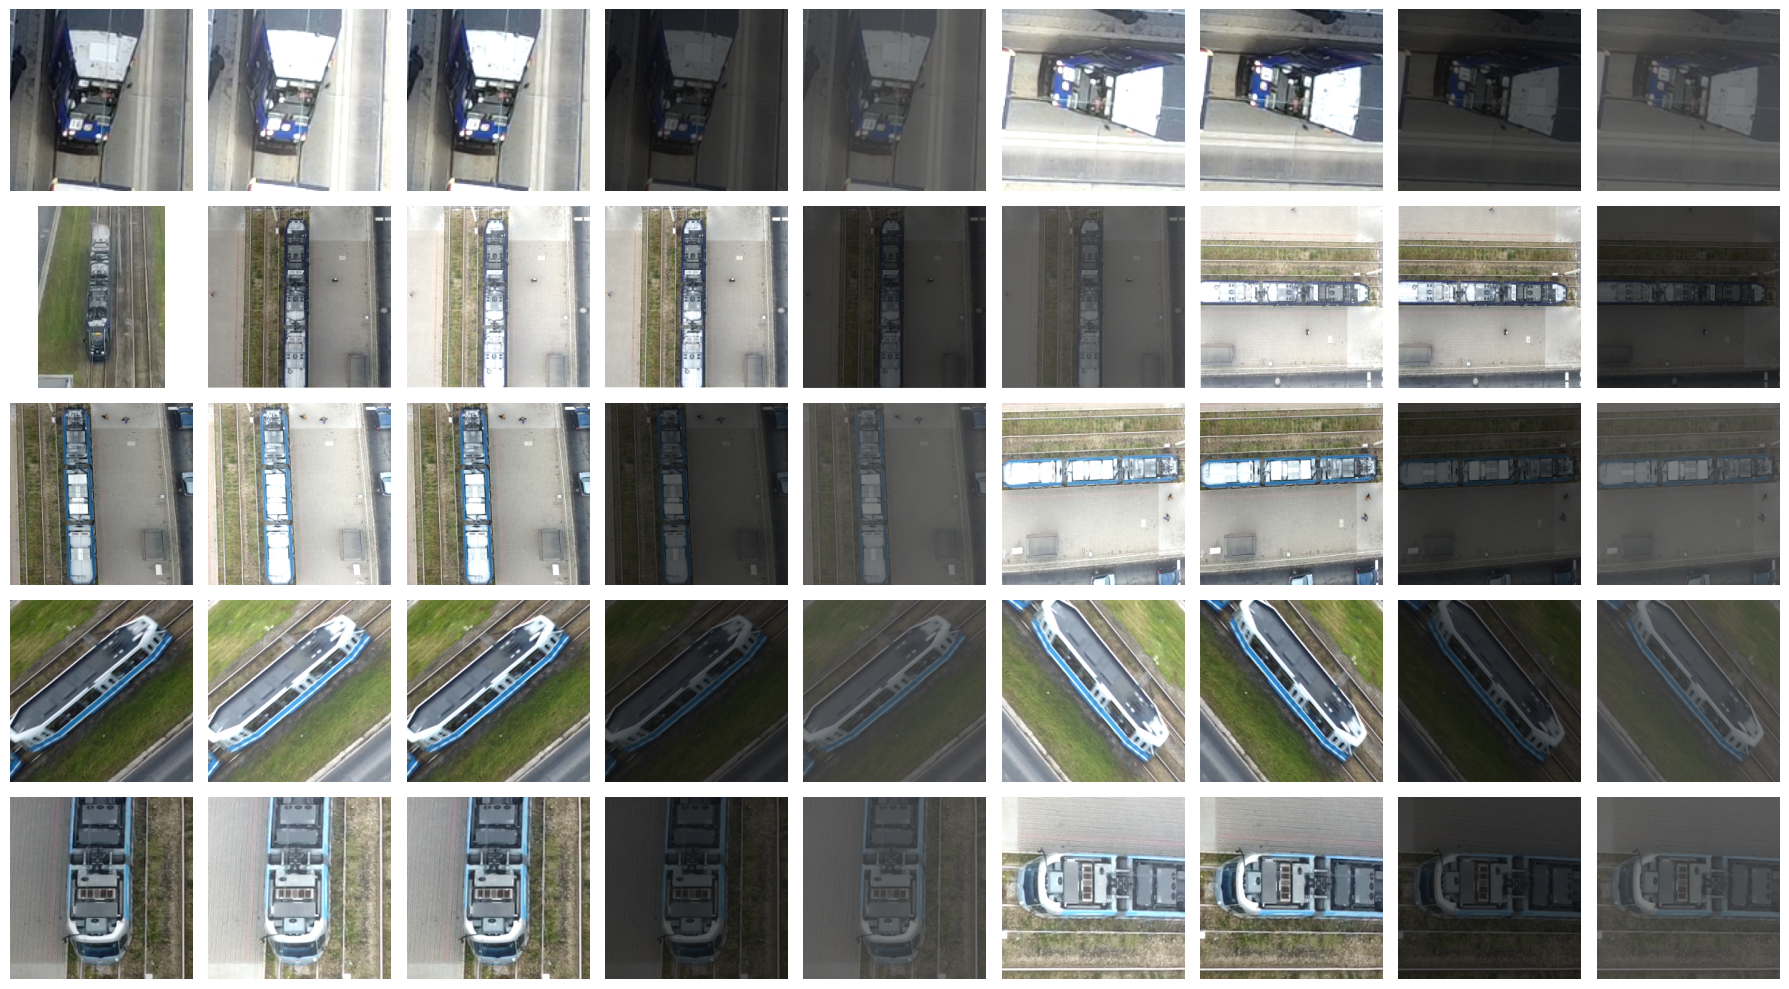

In [7]:
n_versions = 9
plt.figure(figsize=(n_versions * 2, len(labels) * 2))

for row, label in enumerate(labels):
    tram_dir = os.path.join(load_dir, label)
    tram_files = sorted([f for f in os.listdir(tram_dir) if os.path.isfile(os.path.join(tram_dir, f))])
    tram_files = [f for f in tram_files if f.startswith(label)]
    for col in range(min(n_versions, len(tram_files))):
        img_path = os.path.join(tram_dir, tram_files[col])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(labels), n_versions, row * n_versions + col + 1)
        plt.imshow(img)
        plt.axis('off')
        if col == 0:
            plt.ylabel(label, fontsize=12)
plt.tight_layout()
plt.show()

Found 1234 files belonging to 5 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


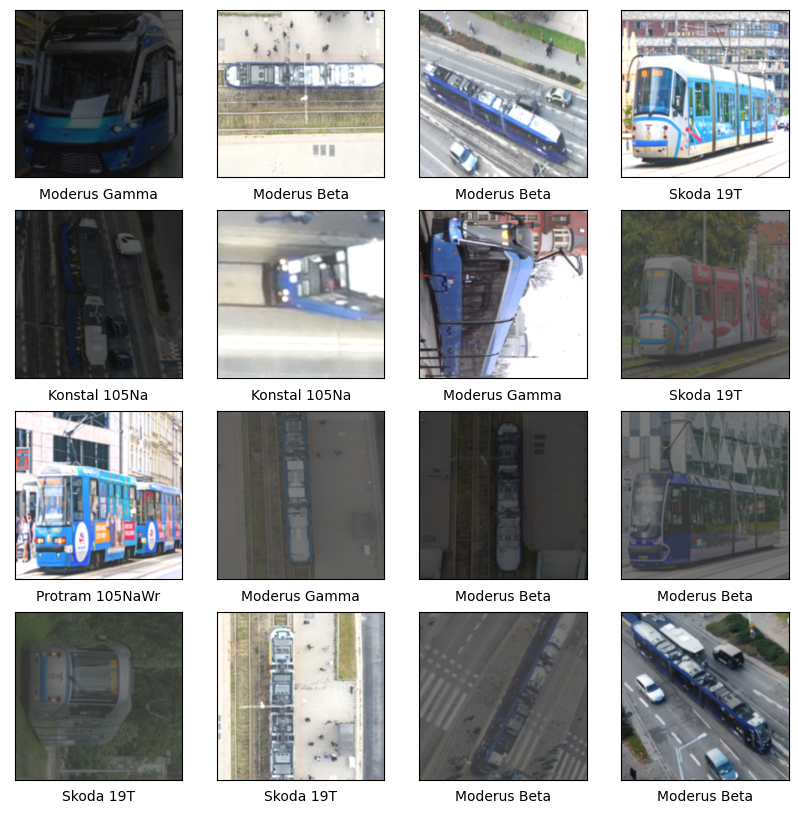

In [8]:
import tensorflow as tf

batch_size = 32
data = tf.keras.utils.image_dataset_from_directory(load_dir,batch_size=batch_size,shuffle=True)
data = data.map(lambda x, y : (x/255,y))
data_np = data.as_numpy_iterator()
batch = data_np.next()
plt.rcParams["figure.figsize"] = (10,10)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(batch[0][i],plt.cm.binary,interpolation='bicubic')
    plt.xlabel(labels[batch[1][i]])
plt.show()


## Dzielenie danych na zbiory
#### Liczby przedstawiają ilość batchy

In [9]:
data = data.shuffle(10000)
train_size = int(0.75 * len(data))
train_data = data.take(train_size)
test_data = data.skip(train_size)

print(f"Train size: {len(train_data)} batches ({train_size * batch_size} images)")
print(f"Test size: {len(test_data)} batches ({(len(data) - train_size) * batch_size} images)")

Train size: 29 batches (928 images)
Test size: 10 batches (320 images)


## Tworzenie sieci neuronowej

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
nn = Sequential([
    Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), activation='relu',input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'),
    Flatten(),

    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

nn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

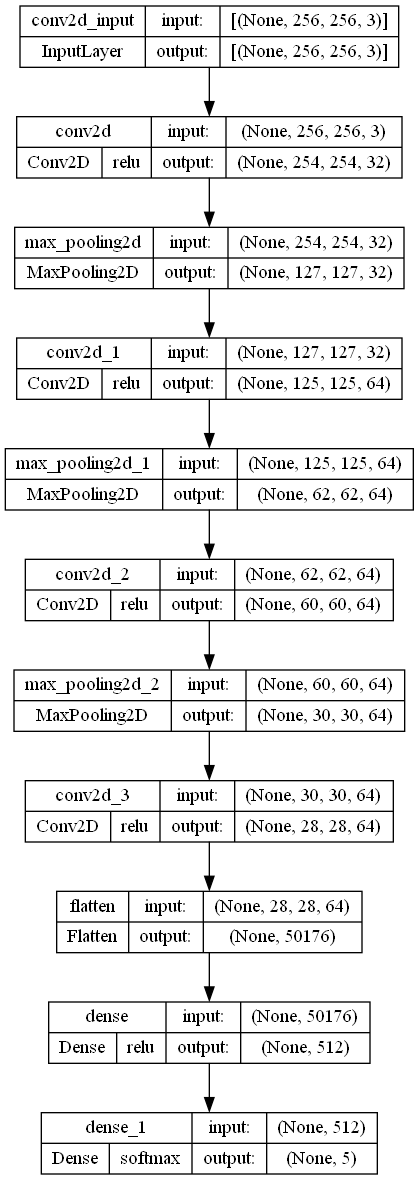

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(nn, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [13]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [14]:
model_path = os.path.join(root, "models","best_model.h5")
print(f"Model will be saved to: {model_path}")
model_checkpoint_callback = ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    mode='max',
    verbose = 1,
    save_best_only=True)

Model will be saved to: c:\Users\adaml\Desktop\tram-prediction\models\best_model.h5


In [15]:
history = nn.fit(
                train_data, 
                epochs=6, 
                validation_data=(test_data),
                callbacks=[EarlyStopping(patience=6),model_checkpoint_callback])           

Epoch 1/6
29/29 [==============================] - ETA: 0s - loss: 1.6794 - accuracy: 0.2615
Epoch 1: val_accuracy improved from -inf to 0.27500, saving model to c:\Users\adaml\Desktop\tram-prediction\models\best_model.h5
29/29 [==============================] - 43s 1s/step - loss: 1.6794 - accuracy: 0.2615 - val_loss: 1.5937 - val_accuracy: 0.2750
Epoch 2/6
29/29 [==============================] - ETA: 0s - loss: 1.5232 - accuracy: 0.3239
Epoch 2: val_accuracy improved from 0.27500 to 0.47500, saving model to c:\Users\adaml\Desktop\tram-prediction\models\best_model.h5
29/29 [==============================] - 42s 1s/step - loss: 1.5232 - accuracy: 0.3239 - val_loss: 1.3797 - val_accuracy: 0.4750
Epoch 3/6
29/29 [==============================] - ETA: 0s - loss: 1.2162 - accuracy: 0.5205
Epoch 3: val_accuracy improved from 0.47500 to 0.70000, saving model to c:\Users\adaml\Desktop\tram-prediction\models\best_model.h5
29/29 [==============================] - 43s 1s/step - loss: 1.2162 - 

<AxesSubplot: >

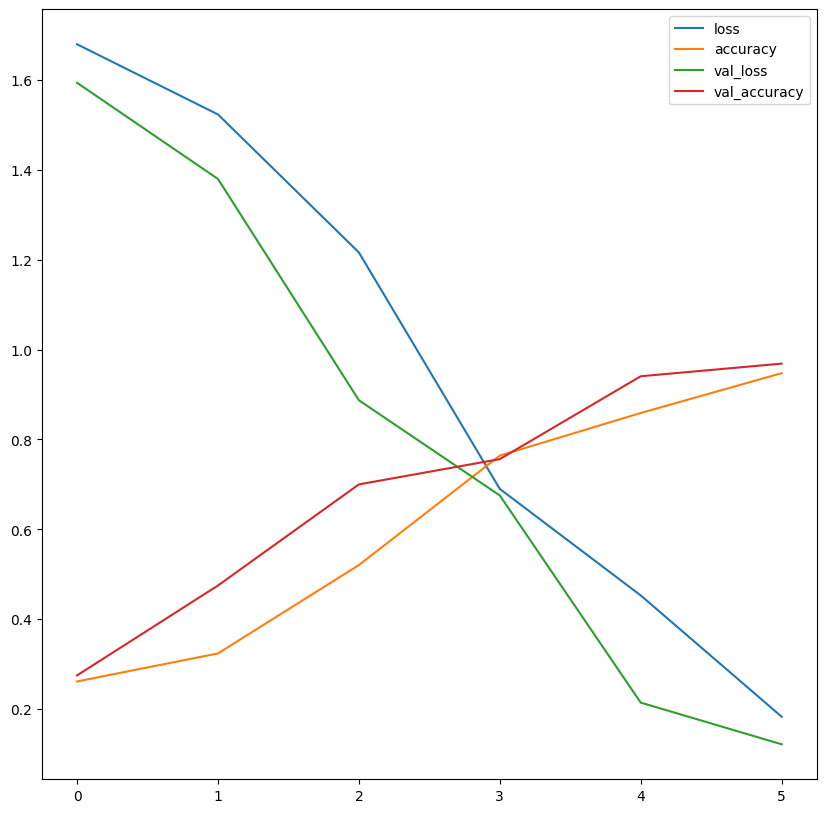

In [16]:
pd.DataFrame(history.history).plot()

In [17]:
from tensorflow.keras.models import load_model
nn = load_model(model_path)

In [18]:
X_test = []
Y_test = []

for x,y in test_data.as_numpy_iterator():
    for val in x:
        X_test.append(val)
    for val in y:
        Y_test.append(val)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

10/10 [==============================] - 2s 187ms/step


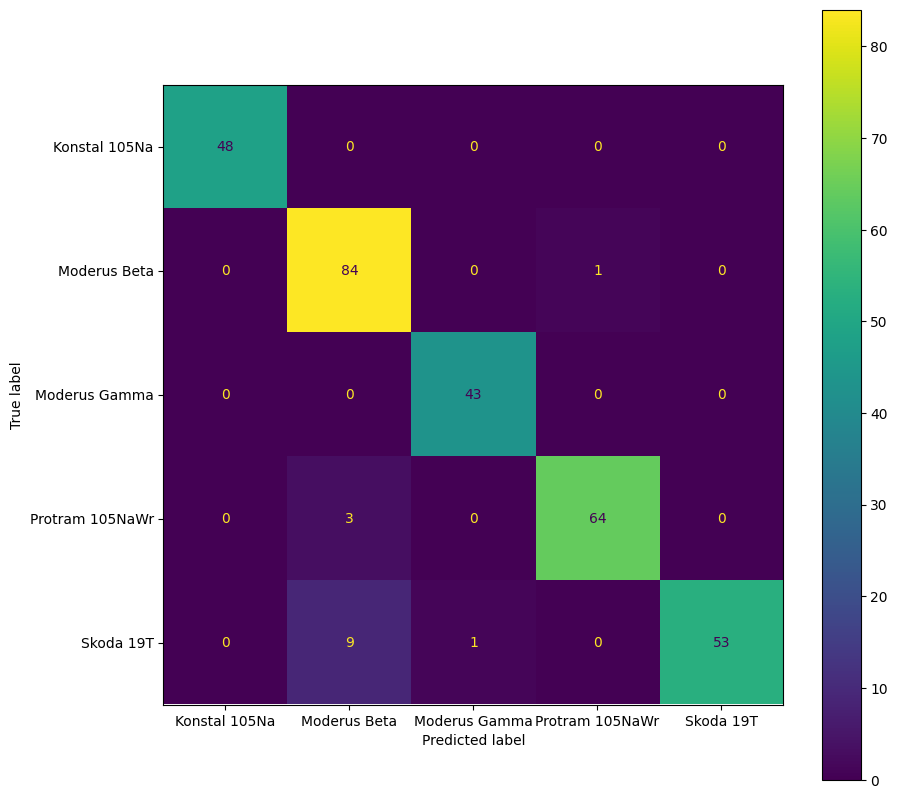

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import numpy as np

Y_pred = np.argmax(nn.predict(X_test), axis=1)
cm = confusion_matrix(Y_test, Y_pred, labels=np.unique(Y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(labels))
disp.plot()

In [20]:
score = accuracy_score(Y_test,Y_pred)
print(f'Precyzja modelu: {np.round(score*100,3)}%')

Precyzja modelu: 95.425%
